In [150]:
import numpy as np
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
import pandas as pd

import matplotlib.pyplot as plt


%matplotlib inline

#### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [151]:
df = pd.read_csv('/Users/Chuoran/DataScience/Metis/My Challenge/challenges_data/2013_movies.csv')

In [152]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [153]:
X = df.iloc[:,[0,1,3,4,5,6]]

X['constant'] = pd.DataFrame(np.repeat(1,300))

In [162]:
X.head()
X['constant'].shape

(100,)

In [155]:
y = df.iloc[:,2]
print(y.shape)

(100,)


In [164]:
lr_model = LinearRegression()
lr_model.fit(X['constant'].reshape(-1,1),y)
y_lr_predict = lr_model.predict(X['constant'].reshape(-1,1))

/Users/Chuoran/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/Chuoran/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


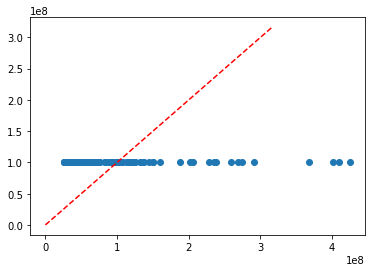

In [168]:
plt.scatter(y,y_lr_predict)
plt.plot(np.linspace(0,10**8.5,10000),np.linspace(0,10**8.5,10000),'r--')

(array([ 47.,  21.,  15.,   3.,   3.,   4.,   3.,   0.,   1.,   3.]),
 array([ -7.50286242e+07,  -3.51186446e+07,   4.79133498e+06,
          4.47013146e+07,   8.46112942e+07,   1.24521274e+08,
          1.64431253e+08,   2.04341233e+08,   2.44251213e+08,
          2.84161192e+08,   3.24071172e+08]),
 <a list of 10 Patch objects>)

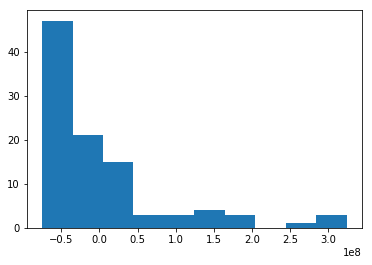

In [169]:
plt.hist(y-y_lr_predict)

# A: Just predicting the mean

#### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [177]:
X2 = X.loc[:,['constant','Budget']]
X2['Budget'].fillna(0,inplace = True)
X2.head()

,constant,Budget
0,1,130000000.0
1,1,200000000.0
2,1,150000000.0
3,1,76000000.0
4,1,225000000.0


In [178]:
lr_model2 = LinearRegression()
lr_model2.fit(X2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [179]:
y_lr2_predict = lr_model2.predict(X2)

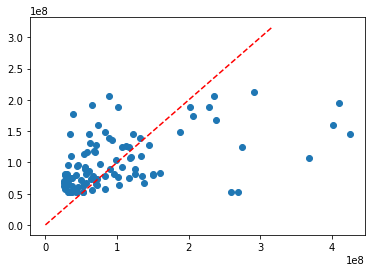

In [181]:
plt.scatter(y,y_lr2_predict)
plt.plot(np.linspace(0,10**8.5,10000),np.linspace(0,10**8.5,10000),'r--')

(array([  4.,  10.,  37.,  27.,  10.,   5.,   1.,   0.,   3.,   3.]),
 array([ -1.39441227e+08,  -9.76078058e+07,  -5.57743841e+07,
         -1.39409625e+07,   2.78924592e+07,   6.97258808e+07,
          1.11559303e+08,   1.53392724e+08,   1.95226146e+08,
          2.37059567e+08,   2.78892989e+08]),
 <a list of 10 Patch objects>)

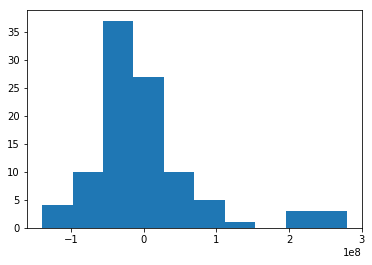

In [182]:
plt.hist(y-y_lr2_predict)

# A: The model is trying to find the plane formed by the mean of the two variables?

#### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [188]:
X3 = X.loc[:,['constant','Budget','Rating']]
X3['Budget'].fillna(0, inplace = True)

In [189]:
cat = list(X3['Rating'].unique())
X3[cat] = pd.get_dummies(X3['Rating'])
X3.iloc[:,[0,1,3,4,5,6]].head()

,constant,Budget,PG-13,PG,G,R
0,1,130000000.0,0,0,1,0
1,1,200000000.0,0,0,1,0
2,1,150000000.0,0,1,0,0
3,1,76000000.0,0,1,0,0
4,1,225000000.0,0,0,1,0


In [190]:
lr_model3 = LinearRegression()
lr_model3.fit(X3.iloc[:,[0,1,3,4,5,6]],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

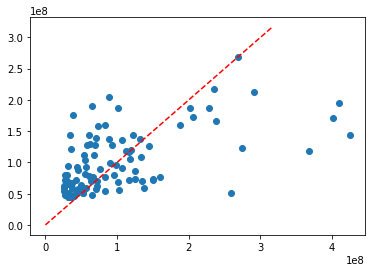

In [192]:
y_lr3_predict = lr_model3.predict(X3.iloc[:,[0,1,3,4,5,6]])
plt.scatter(y,y_lr3_predict)
plt.plot(np.linspace(0,10**8.5,10000),np.linspace(0,10**8.5,10000),'r--')

(array([  4.,  11.,  32.,  33.,   8.,   6.,   1.,   0.,   3.,   2.]),
 array([ -1.38211302e+08,  -9.63505086e+07,  -5.44897151e+07,
         -1.26289216e+07,   2.92318720e+07,   7.10926655e+07,
          1.12953459e+08,   1.54814253e+08,   1.96675046e+08,
          2.38535840e+08,   2.80396633e+08]),
 <a list of 10 Patch objects>)

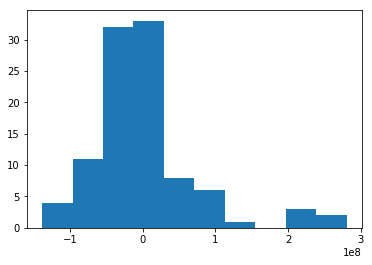

In [193]:
plt.hist(y-y_lr3_predict)

In [206]:
lr_model3.coef_

array([  0.00000000e+00,   7.17830296e-01,   1.61451604e+08,
        -4.33336369e+07,  -5.60876851e+07,  -6.20302816e+07])

# The model is not considering the constant, maybe constructing a separate model for each category of the dummy

#### Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [198]:
X4 = X3
X4['Runtime'] = df['Runtime']
X4.head()
X4.info()
X4 = X4.iloc[:,[0,1,3,4,5,6,7]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
constant    100 non-null int64
Budget      100 non-null float64
Rating      100 non-null object
PG-13       100 non-null uint8
PG          100 non-null uint8
G           100 non-null uint8
R           100 non-null uint8
Runtime     100 non-null int64
dtypes: float64(1), int64(2), object(1), uint8(4)
memory usage: 3.6+ KB


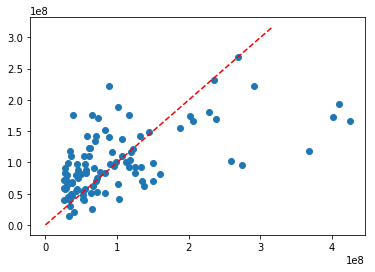

In [208]:
lr_model4 = LinearRegression()
lr_model4.fit(X4,y)
y_lr4_predict = lr_model4.predict(X4)
plt.scatter(y,y_lr4_predict)
plt.plot(np.linspace(0,10**8.5,10000),np.linspace(0,10**8.5,10000),'r--')

(array([  2.,   1.,   4.,   9.,  10.,  14.,  21.,  14.,   8.,   4.,   7.,
          0.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,   2.]),
 array([ -1.37644416e+08,  -1.17869847e+08,  -9.80952779e+07,
         -7.83207089e+07,  -5.85461399e+07,  -3.87715709e+07,
         -1.89970019e+07,   7.77567108e+05,   2.05521361e+07,
          4.03267051e+07,   6.01012741e+07,   7.98758431e+07,
          9.96504121e+07,   1.19424981e+08,   1.39199550e+08,
          1.58974119e+08,   1.78748688e+08,   1.98523257e+08,
          2.18297826e+08,   2.38072395e+08,   2.57846964e+08]),
 <a list of 20 Patch objects>)

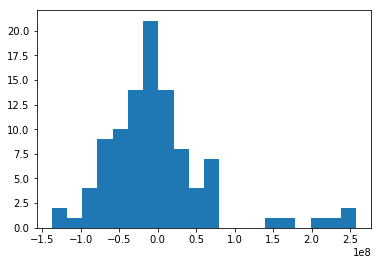

In [209]:
plt.hist(y-y_lr4_predict, bins = 20)

In [210]:
lr_model4.coef_

array([  0.00000000e+00,   6.10830187e-01,   1.57484767e+08,
        -3.04427037e+07,  -6.11611782e+07,  -6.58808855e+07,
         9.63239489e+05])

# A: similar to last

#### Challenge 5

Fitting and checking predictions on the exact same data set can be
misleading. Divide your data into two sets: a training and a test set
(roughly 75% training, 25% test is a fine split). Fit a model on the
training set, check the predictions (by plotting versus actual values)
in the test set.

In [202]:
X_train,X_test,y_train, y_test = train_test_split(X4,y,test_size = 0.25, random_state = 42)

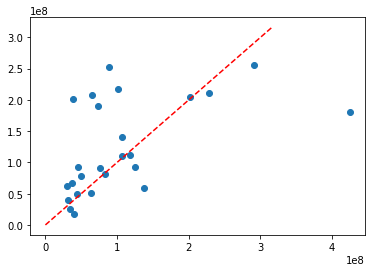

In [211]:
lr_model5 = LinearRegression()
lr_model5.fit(X_train,y_train)
y_lr5_predict = lr_model5.predict(X_test)
plt.scatter(y_test,y_lr5_predict)
plt.plot(np.linspace(0,10**8.5,10000),np.linspace(0,10**8.5,10000),'r--')

(array([ 2.,  1.,  2.,  0.,  0.,  1.,  4.,  5.,  5.,  3.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ -1.63942389e+08,  -1.43580232e+08,  -1.23218074e+08,
         -1.02855917e+08,  -8.24937598e+07,  -6.21316025e+07,
         -4.17694452e+07,  -2.14072880e+07,  -1.04513067e+06,
          1.93170266e+07,   3.96791839e+07,   6.00413412e+07,
          8.04034985e+07,   1.00765656e+08,   1.21127813e+08,
          1.41489970e+08,   1.61852128e+08,   1.82214285e+08,
          2.02576442e+08,   2.22938600e+08,   2.43300757e+08]),
 <a list of 20 Patch objects>)

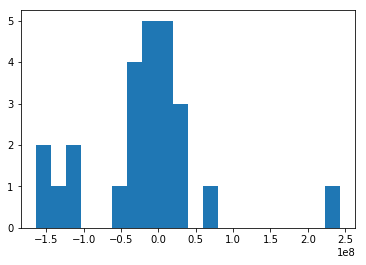

In [212]:
plt.hist(y_test-y_lr5_predict, bins = 20)

In [213]:
lr_model5.coef_

array([  0.00000000e+00,   8.15859729e-01,   1.65405568e+08,
        -4.04654618e+07,  -6.06604490e+07,  -6.42796571e+07,
         8.43045601e+05])